# Bank Term Deposit Marketing Analysis

## Background
Recent decades have seen banks struggle with effectively marketing term-deposit products to prospective clients. The key challenges include:
- Difficulty identifying target customers
- Complex customer decision-making factors
- Need for data-driven marketing approaches

Financial institutions are increasingly leveraging customer data analytics to gain behavioral insights and improve marketing effectiveness.

## Research Objective
This study analyzes bank marketing campaign data using classification techniques and machine learning models to help optimize term deposit subscription rates.

## Dataset Description
The analysis utilizes BankX marketing campaign data containing 45,211 observations across 17 attributes, with the target variable indicating whether clients subscribed to a term deposit.

### Data Categories

**Bank Client Information:**
- Age (numeric)
- Job type (categorical)
- Marital status (categorical: married, divorced/widowed, single)
- Education level (categorical: unknown, secondary, primary, tertiary)
- Credit default status (binary: yes/no)
- Average yearly balance in euros (numeric)
- Housing loan status (binary: yes/no)
- Personal loan status (binary: yes/no)

**Current Campaign Contact Details:**
- Communication type (categorical: unknown, telephone, cellular)
- Last contact day of month (numeric)
- Last contact month (categorical: Jan-Dec)
- Contact duration in seconds (numeric)

**Campaign History:**
- Number of contacts in current campaign (numeric)
- Days since last contact from previous campaign (numeric, -1 if not previously contacted)
- Number of contacts before current campaign (numeric)
- Previous campaign outcome (categorical: unknown, other, failure, success)

**Target Variable:**
- Term deposit subscription (binary: yes/no)

## Expected Outcomes
This analysis aims to:
1. Predict marketing campaign outcomes for individual clients
2. Identify influential factors affecting campaign results
3. Develop customer segmentation profiles for targeted marketing
4. Optimize future campaign strategies for improved subscription rates

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline, Pipeline
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")

### Discover Data :

In [4]:
data = pd.read_csv("bank-full.csv", sep=';')
print("Initial Shape:", data.shape)
print(data.head())
data.info()
data.isnull().sum().to_frame().T
print(data.describe())
print(data.describe(include=['object']))
data

Initial Shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data col

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Bank Marketing Dataset Analysis

## Dataset Overview
The dataset contains information about a bank's marketing campaign results with **45,211 records** and **17 variables** including customer demographics, contact information, and campaign outcomes.

## Data Structure
- **Shape**: 45,211 rows × 17 columns
- **Memory usage**: 5.9+ MB
- **Data types**: 7 numeric features (int64) and 10 categorical features (object)
- **Missing values**: None - all columns have 45,211 non-null values

## Demographic Analysis

### Age Distribution
- **Average age**: 40.94 years
- **Range**: 18 to 95 years
- **Standard deviation**: 10.62 years
- The age distribution shows a working-age population concentration, with the middle 50% of customers between 33 and 48 years old.

### Employment & Education
- Most common job category: **Blue-collar workers** (9,732 customers, 21.5%)
- Education levels dominated by **secondary education** (23,202 customers, 51.3%)

### Marital Status
- **Married**: 27,214 customers (60.2%)
- Other statuses: Single or divorced (39.8% combined)

## Financial Indicators

### Account Balance
- **Average balance**: €1,362.27
- **Median balance**: €448.00
- **Range**: -€8,019 to €102,127
- The wide gap between mean and median indicates a **right-skewed distribution** with some high-value outliers.

### Loans & Housing
- **Housing loan**: 25,130 customers (55.6%) have a housing loan
- **Personal loan**: Only 7,244 customers (16.0%) have a personal loan
- **Default history**: Very few customers (815, about 1.8%) have credit in default

## Campaign Information

### Contact Method
- Primary contact channel: **Cellular** (29,285 contacts, 64.8%)
- **May** was the month with most contacts (13,766, 30.4%)

### Campaign Statistics
- **Average call duration**: 258.16 seconds (about 4.3 minutes)
- **Average campaign contacts**: 2.76 per customer
- Most customers (>75%) had no previous contact before this campaign (-1 in pdays)

### Campaign Response
- **Success rate**: Only 11.7% (5,289 of 45,211) customers subscribed to the product (y = 'yes')
- **Failure rate**: 88.3% (39,922) declined the offer

## Key Insights
1. The campaign had a **relatively low success rate** of 11.7%
2. Most contacts were made via **cellular phone in May**
3. **Blue-collar workers** with **secondary education** form the largest segment
4. The **wide range in account balances** suggests diverse economic backgrounds
5. **No missing data** makes this dataset immediately usable for modeling
6. Previous marketing efforts appear limited, with most customers having no prior contacts

This dataset provides a solid foundation for predictive modeling to improve future campaign targeting and effectiveness.

### update column name

In [ ]:
data.rename(columns={"y": "deposit"}, inplace=True)
def conditions(row):
    if row['deposit'] == 'yes':
        return True
    elif row['deposit'] == 'no':
        return False
    return None
data['deposit'] = data.apply(conditions, axis=1)
first_column = data.pop('deposit')
data.insert(0, 'deposit', first_column)

## Data Cleaning :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("="*80)
print("BANK MARKETING DATASET - COMPREHENSIVE DATA CLEANING")
print("="*80)
print("\n1. INITIAL DATA ASSESSMENT")
print("-"*50)

# Record initial state and create a backup
initial_shape = data.shape
data_original = data.copy()
print(f"Initial dataset dimensions: {initial_shape[0]:,} rows × {initial_shape[1]:,} columns")

# Generate a detailed summary of the dataset
print("\nDataset Overview:")
buffer = []
for col in data.columns:
    col_type = data[col].dtype
    unique_vals = data[col].nunique()
    unique_pct = (unique_vals / len(data)) * 100
    
    if col_type == 'object':
        most_common = data[col].value_counts().index[0]
        most_common_pct = (data[col].value_counts().iloc[0] / len(data)) * 100
        buffer.append(f"- {col}: {col_type} | {unique_vals:,} unique values ({unique_pct:.1f}%) | Most common: '{most_common}' ({most_common_pct:.1f}%)")
    else:
        buffer.append(f"- {col}: {col_type} | {unique_vals:,} unique values ({unique_pct:.1f}%) | Range: {data[col].min()} to {data[col].max()}")

for line in buffer:
    print(line)

BANK MARKETING DATASET - COMPREHENSIVE DATA CLEANING

1. INITIAL DATA ASSESSMENT
--------------------------------------------------
Initial dataset dimensions: 45,211 rows × 17 columns

Dataset Overview:
- deposit: bool | 2 unique values (0.0%) | Range: False to True
- age: int64 | 77 unique values (0.2%) | Range: 18 to 95
- job: object | 12 unique values (0.0%) | Most common: 'blue-collar' (21.5%)
- marital: object | 3 unique values (0.0%) | Most common: 'married' (60.2%)
- education: object | 4 unique values (0.0%) | Most common: 'secondary' (51.3%)
- default: object | 2 unique values (0.0%) | Most common: 'no' (98.2%)
- balance: int64 | 7,168 unique values (15.9%) | Range: -8019 to 102127
- housing: object | 2 unique values (0.0%) | Most common: 'yes' (55.6%)
- loan: object | 2 unique values (0.0%) | Most common: 'no' (84.0%)
- contact: object | 3 unique values (0.0%) | Most common: 'cellular' (64.8%)
- day: int64 | 31 unique values (0.1%) | Range: 1 to 31
- month: object | 12 uniqu

###  Handling Duplicate Records

In [12]:
print("\n2. HANDLING DUPLICATE RECORDS")
print("-"*50)

duplicate_count = data.duplicated().sum()
duplicate_pct = (duplicate_count / len(data)) * 100
print(f"Exact duplicates: {duplicate_count:,} records ({duplicate_pct:.2f}% of dataset)")
if duplicate_count > 0:
    print("\nExample of duplicate records:")
    duplicate_indices = data[data.duplicated(keep='first')].index.tolist()
    duplicate_sample = data.loc[duplicate_indices[:5]] if len(duplicate_indices) > 5 else data.loc[duplicate_indices]
    print(duplicate_sample)
    data = data.drop_duplicates(keep='first')
    print(f"\nAfter removing duplicates: {data.shape[0]:,} rows × {data.shape[1]:,} columns")
    print(f"Removed {initial_shape[0] - data.shape[0]:,} duplicate records")


2. HANDLING DUPLICATE RECORDS
--------------------------------------------------
Exact duplicates: 0 records (0.00% of dataset)


### Missing Values Analysis

In [11]:
print("\n3. MISSING VALUES ANALYSIS")
print("-"*50)
missing_values = data.isnull().sum()
missing_pct = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_pct,
    'Data Type': data.dtypes
})

print("Missing values summary:")
if missing_summary['Missing Values'].sum() > 0:
    print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))
    rows_with_missing = data[data.isnull().any(axis=1)]
    print(f"\nFound {len(rows_with_missing):,} rows with at least one missing value")
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.savefig('missing_values_heatmap.png')
    if len(rows_with_missing) / len(data) < 0.05:
        data = data.dropna()
        print(f"Removed {initial_shape[0] - data.shape[0]:,} rows with missing values (safe to remove as it's <5% of data)")
    else:
        print("WARNING: More than 5% of rows contain missing values.")
        print("Consider imputation instead of dropping. For now, we'll continue with missing values.")
else:
    print("No missing values found in the dataset.")


3. MISSING VALUES ANALYSIS
--------------------------------------------------
Missing values summary:
No missing values found in the dataset.


### Outlier Detection and Handling

In [13]:
print("\n4. OUTLIER DETECTION AND HANDLING")
print("-"*50)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Checking for outliers in {len(numerical_cols)} numerical columns...")

outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers(data, col)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(data)) * 100
    
    if outlier_count > 0:
        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_pct,
            'lower_bound': lower,
            'upper_bound': upper,
            'min': data[col].min(),
            'max': data[col].max()
        }
if outlier_summary:
    outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index')
    print("\nOutlier summary:")
    print(outlier_df.sort_values(by='percentage', ascending=False))
    top_outlier_cols = list(outlier_df.sort_values(by='percentage', ascending=False).index[:3])
    
    if top_outlier_cols:
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(top_outlier_cols, 1):
            plt.subplot(1, 3, i)
            sns.boxplot(y=data[col])
            plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.savefig('outlier_boxplots.png')
        print("\nBoxplots for top outlier columns saved as 'outlier_boxplots.png'")
    for col in outlier_summary:
        if outlier_summary[col]['percentage'] < 1 and (
            outlier_summary[col]['min'] < outlier_summary[col]['lower_bound'] * 10 or
            outlier_summary[col]['max'] > outlier_summary[col]['upper_bound'] * 10
        ):
            print(f"\nCapping extreme outliers in '{col}'")
            data[col] = data[col].clip(
                lower=outlier_summary[col]['lower_bound'],
                upper=outlier_summary[col]['upper_bound']
            )
else:
    print("No significant outliers detected in numerical columns.")


4. OUTLIER DETECTION AND HANDLING
--------------------------------------------------
Checking for outliers in 8 numerical columns...

Outlier summary:
              count  percentage  lower_bound  upper_bound       min        max
pdays          8257      18.263       -1.000       -1.000    -1.000    871.000
previous       8257      18.263        0.000        0.000     0.000    275.000
balance        4729      10.460    -1962.000     3462.000 -8019.000 102127.000
duration       3235       7.155     -221.000      643.000     0.000   4918.000
campaign       3064       6.777       -2.000        6.000     1.000     63.000
campaign_log   1196       2.645       -0.347        2.426     0.693      4.159
age             487       1.077       10.500       70.500    18.000     95.000

Boxplots for top outlier columns saved as 'outlier_boxplots.png'


### Data Type Conversion and Formatting

In [14]:
print("\n5. DATA TYPE CONVERSION AND FORMATTING")
print("-"*50)
print("Checking and converting data types...")
if 'deposit' in data.columns and data['deposit'].dtype == 'object':
    if set(data['deposit'].unique()) == {'yes', 'no'}:
        data['deposit'] = data['deposit'].map({'yes': True, 'no': False})
        print("Converted 'deposit' column from yes/no to boolean")
if all(col in data.columns for col in ['day', 'month']):
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    current_year = dt.datetime.now().year
    data['contact_date'] = data.apply(
        lambda x: dt.date(current_year, month_map[x['month']], x['day']), 
        axis=1
    )
    print("Created 'contact_date' column from day and month fields")


5. DATA TYPE CONVERSION AND FORMATTING
--------------------------------------------------
Checking and converting data types...
Created 'contact_date' column from day and month fields


### Categorical Data Encoding :

In [15]:
print("\n6. CATEGORICAL DATA ENCODING")
print("-"*50)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_cols)} categorical columns")
cat_cardinality = {col: data[col].nunique() for col in categorical_cols}
print("\nCardinality of categorical columns:")
for col, count in sorted(cat_cardinality.items(), key=lambda x: x[1], reverse=True):
    print(f"- {col}: {count} unique values")
if categorical_cols:
    low_card_cols = [col for col, count in cat_cardinality.items() if 2 <= count <= 10]
    if low_card_cols:
        example_col = low_card_cols[0]
        print(f"\nApplying one-hot encoding to '{example_col}' as an example")
        dummies = pd.get_dummies(data[example_col], prefix=example_col)
        data = pd.concat([data, dummies], axis=1)
        print(f"Added {dummies.shape[1]} new columns for '{example_col}' values")



6. CATEGORICAL DATA ENCODING
--------------------------------------------------
Found 10 categorical columns

Cardinality of categorical columns:
- contact_date: 318 unique values
- job: 12 unique values
- month: 12 unique values
- education: 4 unique values
- poutcome: 4 unique values
- marital: 3 unique values
- contact: 3 unique values
- default: 2 unique values
- housing: 2 unique values
- loan: 2 unique values

Applying one-hot encoding to 'marital' as an example
Added 3 new columns for 'marital' values


### Feature Creation and Transformation :

In [16]:
print("\n7. FEATURE CREATION AND TRANSFORMATION")
print("-"*50)
if 'age' in data.columns:
    bins = [0, 20, 30, 40, 50, 60, 100]
    labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
    print("Created 'age_group' feature from 'age'")
if 'balance' in data.columns:
    data['balance_category'] = pd.qcut(
        data['balance'], 
        q=4, 
        labels=['Low', 'Medium-Low', 'Medium-High', 'High']
    )
    print("Created 'balance_category' feature from 'balance'")
for col in numerical_cols:
    skew = data[col].skew()
    if abs(skew) > 1.5:
        if (data[col] <= 0).any():
            continue
        data[f'{col}_log'] = np.log1p(data[col])
        print(f"Created log-transformed feature '{col}_log' (original skew: {skew:.2f})")



7. FEATURE CREATION AND TRANSFORMATION
--------------------------------------------------
Created 'age_group' feature from 'age'
Created 'balance_category' feature from 'balance'
Created log-transformed feature 'campaign_log' (original skew: 4.90)


### Final Clean Dataset Summary :

In [19]:
print("\n8. FINAL DATASET SUMMARY")
print("-"*50)
print(f"Original dataset: {initial_shape[0]:,} rows × {initial_shape[1]:,} columns")
print(f"Cleaned dataset:  {data.shape[0]:,} rows × {data.shape[1]:,} columns")
print(f"Difference:       {initial_shape[0] - data.shape[0]:,} rows, {data.shape[1] - initial_shape[1]:,} columns")

memory_usage = data.memory_usage(deep=True).sum() / (1024 * 1024)  # MB
print(f"\nMemory usage: {memory_usage:.2f} MB")
print("\nSample of cleaned dataset:")
print(data.head())
data.to_csv('bank_data_cleaned.csv', index=False)
print("\nCleaned dataset saved to 'bank_data_cleaned.csv'")

print("\nData cleaning and preprocessing complete!")


8. FINAL DATASET SUMMARY
--------------------------------------------------
Original dataset: 45,211 rows × 17 columns
Cleaned dataset:  45,211 rows × 27 columns
Difference:       0 rows, 10 columns

Memory usage: 26.00 MB

Sample of cleaned dataset:
   deposit  age           job  marital  education default  balance housing loan  contact  day month  duration  \
0    False   58    management  married   tertiary      no     2143     yes   no  unknown    5   may       261   
1    False   44    technician   single  secondary      no       29     yes   no  unknown    5   may       151   
2    False   33  entrepreneur  married  secondary      no        2     yes  yes  unknown    5   may        76   
3    False   47   blue-collar  married    unknown      no     1506     yes   no  unknown    5   may        92   
4    False   33       unknown   single    unknown      no        1      no   no  unknown    5   may       198   

   campaign  pdays  previous poutcome contact_date  marital_divorced 

## Comprehensive Exploratory Data Analysis (EDA) for Bank Marketing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.precision', 2)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("="*80)
print("BANK MARKETING DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("="*80)
print(f"\nDataset dimensions: {data.shape[0]:,} rows × {data.shape[1]:,} columns")

print("\n1. TARGET VARIABLE ANALYSIS")
print("-"*50)

if 'deposit' in data.columns:
    if data['deposit'].dtype != 'bool':
        if set(data['deposit'].unique()) == {'yes', 'no'}:
            data['deposit'] = data['deposit'].map({'yes': True, 'no': False})
        elif set(data['deposit'].unique()) == {1, 0}:
            data['deposit'] = data['deposit'].astype(bool)
    deposit_counts = data['deposit'].value_counts()
    deposit_percentage = data['deposit'].value_counts(normalize=True) * 100
    
    print("Target variable distribution:")
    distribution_df = pd.DataFrame({
        'Count': deposit_counts,
        'Percentage': deposit_percentage
    })
    print(distribution_df)
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='deposit', data=data, palette='viridis')
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.01*total,
                f'{height/total:.1%}', ha="center", fontsize=12)
    
    plt.title('Distribution of Target Variable (Deposit)', fontsize=15)
    plt.xlabel('Customer Subscribed to Term Deposit', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.savefig('target_distribution.png')
    plt.close()
    
    print(f"\nTarget distribution plot saved as 'target_distribution.png'")
    min_class = min(deposit_counts)
    max_class = max(deposit_counts)
    imbalance_ratio = max_class / min_class
    
    print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 3:
        print("WARNING: Significant class imbalance detected. Consider using:")
        print("  - Resampling techniques (oversampling/undersampling)")
        print("  - Class weights in modeling")
        print("  - Evaluation metrics like F1-score, AUC-ROC instead of accuracy")


BANK MARKETING DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS

Dataset dimensions: 45,211 rows × 27 columns

1. TARGET VARIABLE ANALYSIS
--------------------------------------------------
Target variable distribution:
         Count  Percentage
deposit                   
False    39922      88.302
True      5289      11.698

Target distribution plot saved as 'target_distribution.png'

Class imbalance ratio: 7.55:1
  - Resampling techniques (oversampling/undersampling)
  - Class weights in modeling
  - Evaluation metrics like F1-score, AUC-ROC instead of accuracy


### Univariate Analysis - Categorical Features

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n2. UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("-" * 50)
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
if 'deposit' in categorical_cols:
    categorical_cols.remove('deposit')
one_hot_prefixes = ['marital_', 'education_', 'job_']
categorical_cols = [col for col in categorical_cols if not any(col.startswith(prefix) for prefix in one_hot_prefixes)]
print(f"Analyzing {len(categorical_cols)} categorical features...")
if not os.path.exists('plots/categorical'):
    os.makedirs('plots/categorical')

for i, col in enumerate(categorical_cols):
    try:
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in dataframe. Skipping...")
            continue
        count_df = pd.DataFrame(data[col].value_counts()).reset_index()
        count_df.columns = [col, 'Count']
        count_df['Percentage'] = count_df['Count'] / count_df['Count'].sum() * 100
        print(f"\n{col}:")
        print(count_df.head(10))
        if data[col].nunique() > 15:
            print(f"  Too many categories ({data[col].nunique()}) to plot effectively.")
            continue
        plt.figure(figsize=(10, 6))g
        if data[col].dtype == 'bool':
            plot_data = data.copy()
            plot_data[col] = plot_data[col].astype(str)
        else:
            plot_data = data
        ax = sns.countplot(y=col, data=plot_data,
                           order=plot_data[col].value_counts().index,
                           palette='viridis')
        total = len(data)
        for p in ax.patches:
            width = p.get_width()
            plt.text(width + 0.02 * total, p.get_y() + p.get_height() / 2.,
                     f'{width/total:.1%}', va='center', fontsize=10)

        plt.title(f'Distribution of {col}', fontsize=15)
        plt.tight_layout()
        plt.savefig(f'plots/categorical/{col}_distribution.png')
        plt.close()

    except Exception as e:
        print(f"Error processing column '{col}': {str(e)}")
        continue

print(f"\nCategorical feature plots saved in 'plots/categorical/' directory")


2. UNIVARIATE ANALYSIS - CATEGORICAL FEATURES
--------------------------------------------------
Analyzing 12 categorical features...

job:
             job  Count  Percentage
0    blue-collar   9732      21.526
1     management   9458      20.920
2     technician   7597      16.803
3         admin.   5171      11.437
4       services   4154       9.188
5        retired   2264       5.008
6  self-employed   1579       3.493
7   entrepreneur   1487       3.289
8     unemployed   1303       2.882
9      housemaid   1240       2.743

marital:
    marital  Count  Percentage
0   married  27214      60.193
1    single  12790      28.290
2  divorced   5207      11.517

education:
   education  Count  Percentage
0  secondary  23202      51.319
1   tertiary  13301      29.420
2    primary   6851      15.153
3    unknown   1857       4.107

default:
  default  Count  Percentage
0      no  44396      98.197
1     yes    815       1.803

housing:
  housing  Count  Percentage
0     yes  25130     

### Univariate Analysis - Numerical Features

In [ ]:
print("\n3. UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("-"*50)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if data[col].nunique() > 2]
print(f"Analyzing {len(numerical_cols)} numerical features...")
if not os.path.exists('plots/numerical'):
    os.makedirs('plots/numerical')
num_stats = data[numerical_cols].describe().T
num_stats['range'] = num_stats['max'] - num_stats['min']
num_stats['skew'] = data[numerical_cols].skew()
num_stats['kurtosis'] = data[numerical_cols].kurtosis()
num_stats['median'] = data[numerical_cols].median()
num_stats['cv'] = num_stats['std'] / num_stats['mean']
print("\nNumerical features statistics:")
print(num_stats)
for col in numerical_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(data=data, x=col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}', fontsize=14)
    sns.boxplot(y=data[col], ax=ax2)
    ax2.set_title(f'Boxplot of {col}', fontsize=14)
    
    plt.tight_layout()
    plt.savefig(f'plots/numerical/{col}_analysis.png')
    plt.close()

print(f"\nNumerical feature plots saved in 'plots/numerical/' directory")



3. UNIVARIATE ANALYSIS - NUMERICAL FEATURES
--------------------------------------------------
Analyzing 8 numerical features...

Numerical features statistics:
                 count     mean      std       min     25%     50%      75%        max      range   skew  kurtosis  \
age          45211.000   40.936   10.619    18.000  33.000  39.000   48.000     95.000     77.000  0.685     0.320   
balance      45211.000 1362.272 3044.766 -8019.000  72.000 448.000 1428.000 102127.000 110146.000  8.360   140.752   
day          45211.000   15.806    8.322     1.000   8.000  16.000   21.000     31.000     30.000  0.093    -1.060   
duration     45211.000  258.163  257.528     0.000 103.000 180.000  319.000   4918.000   4918.000  3.144    18.154   
campaign     45211.000    2.764    3.098     1.000   1.000   2.000    3.000     63.000     62.000  4.899    39.250   
pdays        45211.000   40.198  100.129    -1.000  -1.000  -1.000   -1.000    871.000    872.000  2.616     6.935   
previous    

### Bivariate Analysis with Target :

In [29]:
print("\n4. BIVARIATE ANALYSIS WITH TARGET")
print("-"*50)
if not os.path.exists('plots/bivariate'):
    os.makedirs('plots/bivariate')

if 'deposit' in data.columns:
    print("\nCategorical features vs target:")
    
    for col in categorical_cols:
        if data[col].nunique() <= 15:
            cross_tab = pd.crosstab(data[col], data['deposit'], normalize='index') * 100
            print(f"\n{col} vs deposit (% of each category subscribing):")
            print(cross_tab)
            plt.figure(figsize=(12, 6))
            cross_tab[True].sort_values(ascending=False).plot(kind='bar', color='teal')
            plt.title(f'Deposit Subscription Rate by {col}', fontsize=15)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Subscription Rate (%)', fontsize=12)
            plt.axhline(y=data['deposit'].mean()*100, color='red', linestyle='--',
                       label=f'Overall Average: {data["deposit"].mean()*100:.1f}%')
            plt.legend()
            plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
            plt.tight_layout()
            plt.savefig(f'plots/bivariate/{col}_vs_target.png')
            plt.close()
    print("\nNumerical features vs target:")
    
    for col in numerical_cols:
        group_stats = data.groupby('deposit')[col].agg(['mean', 'median', 'std'])
        print(f"\n{col} statistics by deposit outcome:")
        print(group_stats)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='deposit', y=col, data=data, palette='viridis')
        plt.title(f'{col} by Deposit Outcome', fontsize=15)
        plt.tight_layout()
        plt.savefig(f'plots/bivariate/{col}_vs_target_box.png')
        plt.close()
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=col, hue='deposit', element='step', kde=True, common_norm=False)
        plt.title(f'Distribution of {col} by Deposit Outcome', fontsize=15)
        plt.tight_layout()
        plt.savefig(f'plots/bivariate/{col}_vs_target_dist.png')
        plt.close()

    print(f"\nBivariate analysis plots saved in 'plots/bivariate/' directory")



4. BIVARIATE ANALYSIS WITH TARGET
--------------------------------------------------

Categorical features vs target:

job vs deposit (% of each category subscribing):
deposit        False  True 
job                        
admin.        87.797 12.203
blue-collar   92.725  7.275
entrepreneur  91.728  8.272
housemaid     91.210  8.790
management    86.244 13.756
retired       77.208 22.792
self-employed 88.157 11.843
services      91.117  8.883
student       71.322 28.678
technician    88.943 11.057
unemployed    84.497 15.503
unknown       88.194 11.806

marital vs deposit (% of each category subscribing):
deposit   False  True 
marital               
divorced 88.055 11.945
married  89.877 10.123
single   85.051 14.949

education vs deposit (% of each category subscribing):
deposit    False  True 
education              
primary   91.374  8.626
secondary 89.441 10.559
tertiary  84.994 15.006
unknown   86.430 13.570

default vs deposit (% of each category subscribing):
deposit  False  

### Correlation Analysis :

In [ ]:
print("\n5. CORRELATION ANALYSIS")
print("-"*50)
corr_matrix = data[numerical_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix.round(2))
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()
print(f"\nCorrelation heatmap saved as 'correlation_heatmap.png'")

high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                                   corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nHighly correlated feature pairs (|correlation| >= 0.7):")
    for pair in high_corr_pairs:
        print(f"- {pair[0]} & {pair[1]}: {pair[2]:.3f}")
    print("\nConsider removing one feature from each highly correlated pair to reduce multicollinearity.")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7).")



5. CORRELATION ANALYSIS
--------------------------------------------------

Correlation matrix:
                age  balance    day  duration  campaign  pdays  previous  campaign_log
age           1.000    0.100 -0.010    -0.000     0.000 -0.020     0.000         0.020
balance       0.100    1.000  0.000     0.020    -0.010  0.000     0.020        -0.020
day          -0.010    0.000  1.000    -0.030     0.160 -0.090    -0.050         0.170
duration     -0.000    0.020 -0.030     1.000    -0.080 -0.000     0.000        -0.070
campaign      0.000   -0.010  0.160    -0.080     1.000 -0.090    -0.030         0.890
pdays        -0.020    0.000 -0.090    -0.000    -0.090  1.000     0.450        -0.100
previous      0.000    0.020 -0.050     0.000    -0.030  0.450     1.000        -0.030
campaign_log  0.020   -0.020  0.170    -0.070     0.890 -0.100    -0.030         1.000

Correlation heatmap saved as 'correlation_heatmap.png'

Highly correlated feature pairs (|correlation| >= 0.7):
- campa

### Dimensionality Reduction (PCA Visualization) :

In [31]:
print("\n6. PCA VISUALIZATION")
print("-"*50)
pca_data = data[numerical_cols].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
if 'deposit' in data.columns:
    pca_df['deposit'] = data['deposit']
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='deposit', data=pca_df, palette='viridis', alpha=0.7)
    plt.title('PCA: 2D Projection of the Dataset', fontsize=16)
    plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
    plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
    plt.tight_layout()
    plt.savefig('pca_visualization.png')
    plt.close()
    
    print(f"PCA visualization saved as 'pca_visualization.png'")
    print(f"Total variance explained by 2 principal components: {sum(pca.explained_variance_ratio_):.2%}")
    component_df = pd.DataFrame(
        pca.components_.T, 
        columns=['PC1', 'PC2'], 
        index=numerical_cols
    )
    
    print("\nFeature contribution to principal components:")
    print(component_df)



6. PCA VISUALIZATION
--------------------------------------------------
PCA visualization saved as 'pca_visualization.png'
Total variance explained by 2 principal components: 42.91%

Feature contribution to principal components:
                PC1    PC2
age           0.016 -0.020
balance      -0.024  0.009
day           0.244 -0.074
duration     -0.109 -0.065
campaign      0.656  0.195
pdays        -0.212  0.664
previous     -0.148  0.688
campaign_log  0.656  0.192


### Target vs Key Features Analysis :

In [32]:
print("\n7. TARGET VS KEY FEATURES ANALYSIS")
print("-"*50)

if 'deposit' in data.columns:
    if not os.path.exists('plots/key_features'):
        os.makedirs('plots/key_features')
    target_numeric = data['deposit'].astype(int)
    feature_correlation = {}
    
    for col in numerical_cols:
        feature_correlation[col] = np.corrcoef(data[col], target_numeric)[0, 1]
    sorted_features = sorted(feature_correlation.items(), key=lambda x: abs(x[1]), reverse=True)
    print("\nFeatures sorted by correlation with target:")
    for feature, corr in sorted_features:
        print(f"- {feature}: {corr:.3f}")
    top_n = min(5, len(sorted_features))
    top_features = [feat for feat, _ in sorted_features[:top_n]]
    
    print(f"\nAnalyzing top {top_n} numerical features by correlation with target:")
    for feature in top_features:
        data[f'{feature}_bin'] = pd.qcut(data[feature], q=10, duplicates='drop')
        bin_analysis = data.groupby(f'{feature}_bin')['deposit'].agg(['count', 'mean'])
        bin_analysis.columns = ['Count', 'Subscription Rate']
        bin_analysis['Subscription Rate'] = bin_analysis['Subscription Rate'] * 100
        print(f"\nSubscription rate by {feature} bins:")
        print(bin_analysis)
        plt.figure(figsize=(12, 6))
        ax = bin_analysis['Subscription Rate'].plot(kind='bar', color='teal')
        plt.title(f'Subscription Rate by {feature} Ranges', fontsize=15)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Subscription Rate (%)', fontsize=12)
        plt.axhline(y=data['deposit'].mean()*100, color='red', linestyle='--',
                   label=f'Overall Average: {data["deposit"].mean()*100:.1f}%')
        plt.legend()
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        for i, v in enumerate(bin_analysis['Count']):
            ax.text(i, 0.5, f'n: {v}', rotation=90, ha='center', va='bottom', fontsize=8)  
        plt.tight_layout()
        plt.savefig(f'plots/key_features/{feature}_bins_vs_target.png')
        plt.close()
        data.drop(f'{feature}_bin', axis=1, inplace=True)
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = stats.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    cat_association = {}
    for col in categorical_cols:
        if data[col].nunique() <= 20: 
            cat_association[col] = cramers_v(data[col], data['deposit'])
    sorted_cat_features = sorted(cat_association.items(), key=lambda x: x[1], reverse=True)
    print("\nCategorical features sorted by association with target (Cramer's V):")
    for feature, assoc in sorted_cat_features:
        print(f"- {feature}: {assoc:.3f}")
    top_cat_n = min(5, len(sorted_cat_features))
    top_cat_features = [feat for feat, _ in sorted_cat_features[:top_cat_n]]
    
    print(f"\nAnalyzing top {top_cat_n} categorical features by association with target:")
    
    for feature in top_cat_features:
        cat_analysis = data.groupby(feature)['deposit'].agg(['count', 'mean'])
        cat_analysis.columns = ['Count', 'Subscription Rate']
        cat_analysis['Subscription Rate'] = cat_analysis['Subscription Rate'] * 100
        cat_analysis = cat_analysis.sort_values('Subscription Rate', ascending=False)
        print(f"\nSubscription rate by {feature} categories:")
        print(cat_analysis)
        plt.figure(figsize=(12, 6))
        ax = cat_analysis['Subscription Rate'].plot(kind='bar', color='teal')
        plt.title(f'Subscription Rate by {feature}', fontsize=15)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Subscription Rate (%)', fontsize=12)
        plt.axhline(y=data['deposit'].mean()*100, color='red', linestyle='--',
                   label=f'Overall Average: {data["deposit"].mean()*100:.1f}%')
        plt.legend()
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        for i, v in enumerate(cat_analysis['Count']):
            ax.text(i, 0.5, f'n: {v}', rotation=90, ha='center', va='bottom', fontsize=8)
            
        plt.tight_layout()
        plt.savefig(f'plots/key_features/{feature}_vs_target.png')
        plt.close()
    
    print(f"\nKey feature analysis plots saved in 'plots/key_features/' directory")



7. TARGET VS KEY FEATURES ANALYSIS
--------------------------------------------------

Features sorted by correlation with target:
- duration: 0.395
- pdays: 0.104
- previous: 0.093
- campaign_log: -0.086
- campaign: -0.073
- balance: 0.053
- day: -0.028
- age: 0.025

Analyzing top 5 numerical features by correlation with target:

Subscription rate by duration bins:
                 Count  Subscription Rate
duration_bin                             
(-0.001, 58.0]    4529              0.199
(58.0, 89.0]      4576              1.246
(89.0, 117.0]     4495              2.848
(117.0, 147.0]    4564              4.579
(147.0, 180.0]    4496              6.806
(180.0, 223.0]    4531              9.049
(223.0, 280.0]    4517             12.331
(280.0, 368.0]    4468             13.787
(368.0, 548.0]    4527             20.853
(548.0, 4918.0]   4508             45.541

Subscription rate by pdays bins:
                 Count  Subscription Rate
pdays_bin                                
(-1.001,

### Feature Engineering Ideas :

In [36]:
print("\n8. FEATURE ENGINEERING IDEAS")
print("-"*50)
print("Based on the exploratory data analysis, here are potential feature engineering ideas:")
if 'age' in data.columns:
    print("\nAge-related features:")
    print("- Age groups (already implemented)")
    print("- Age^2 to capture non-linear effects")
    print("- Retirement status (age >= 65)")
    print("- Young professional (25 <= age <= 35)")
if 'balance' in data.columns:
    print("\nBalance-related features:")
    print("- Balance categories (already implemented)")
    print("- Log-transformed balance (for skewed distribution)")
    print("- Zero balance indicator")
    print("- High balance indicator (top 10%)")
if 'duration' in data.columns:
    print("\nDuration-related features:")
    print("- Call length categories (short, medium, long)")
    print("- Duration beyond average")
    print("- Log-transformed duration")
if all(col in data.columns for col in ['campaign', 'previous', 'pdays']):
    print("\nCampaign-related features:")
    print("- First-time contact indicator (previous = 0)")
    print("- Recently contacted (pdays < 30 days)")
    print("- Extensively contacted (campaign > 3)")
    print("- Days since last contact (for those previously contacted)")
    print("- Contact frequency derived from campaign and previous")
if 'month' in data.columns and 'day' in data.columns:
    print("\nTemporal features:")
    print("- Season (based on month)")
    print("- Quarter (Q1, Q2, Q3, Q4)")
    print("- Is weekend (if day of week is available)")
    print("- Is month start/end (for financial relevance)")
    print("- Is holiday season (Nov-Dec)")

print("\nInteraction features:")
print("- Age × Job: Different age groups within the same profession may behave differently")
print("- Balance × Education: Financial capacity combined with education level")
print("- Duration × Previous: Effect of call duration based on previous contacts")
print("- Job × Marital: Financial decision-making patterns across different job-marital combinations")



8. FEATURE ENGINEERING IDEAS
--------------------------------------------------
Based on the exploratory data analysis, here are potential feature engineering ideas:

Age-related features:
- Age groups (already implemented)
- Age^2 to capture non-linear effects
- Retirement status (age >= 65)
- Young professional (25 <= age <= 35)

Balance-related features:
- Balance categories (already implemented)
- Log-transformed balance (for skewed distribution)
- Zero balance indicator
- High balance indicator (top 10%)

Duration-related features:
- Call length categories (short, medium, long)
- Duration beyond average
- Log-transformed duration

Campaign-related features:
- First-time contact indicator (previous = 0)
- Recently contacted (pdays < 30 days)
- Extensively contacted (campaign > 3)
- Days since last contact (for those previously contacted)
- Contact frequency derived from campaign and previous

Temporal features:
- Season (based on month)
- Quarter (Q1, Q2, Q3, Q4)
- Is weekend (if 

### EDA Summary and Recommendations :

In [37]:
print("\n9. EDA SUMMARY AND RECOMMENDATIONS")
print("-"*50)
print("Key insights from exploratory data analysis:")

if 'deposit' in data.columns:
    subscription_rate = data['deposit'].mean() * 100
    print(f"\n1. Target variable: {subscription_rate:.1f}% subscription rate overall")
    print("   - Class imbalance should be addressed during modeling")

print("\n2. Demographics:")
if 'age' in data.columns:
    print(f"   - Customer age ranges from {data['age'].min()} to {data['age'].max()} years")
    print(f"   - Average age is {data['age'].mean():.1f} years")

if 'job' in data.columns and data['job'].nunique() < 20:
    top_job = data['job'].value_counts().index[0]
    top_job_pct = data['job'].value_counts(normalize=True)[0] * 100
    print(f"   - {top_job_pct:.1f}% of customers work in the '{top_job}' sector")

if 'balance' in data.columns:
    print(f"   - Average account balance is {data['balance'].mean():.2f}")
    print(f"   - {(data['balance'] <= 0).mean()*100:.1f}% of customers have zero or negative balance")

print("\n3. Campaign effectiveness:")
if 'duration' in data.columns:
    print(f"   - Average call duration is {data['duration'].mean()/60:.1f} minutes")
    
if 'campaign' in data.columns:
    print(f"   - Customers are contacted {data['campaign'].mean():.1f} times on average during this campaign")
    print(f"   - {(data['campaign'] > 3).mean()*100:.1f}% of customers were contacted more than 3 times")

if 'poutcome' in data.columns:
    success_rate = (data['poutcome'] == 'success').mean() * 100 if 'success' in data['poutcome'].unique() else 0
    print(f"   - {success_rate:.1f}% of customers had successful previous campaigns")

print("\n4. Key findings:")
print("   - Call duration shows strong correlation with subscription likelihood")
print("   - Previous campaign success is a strong predictor of current campaign success")
print("   - Customers contacted in certain months (e.g., March, Sept, Dec) show higher subscription rates")
print("   - Higher balance customers tend to subscribe more frequently")
print("   - There are seasonal patterns in subscription rates")

print("\n5. Recommendations for modeling:")
print("   - Consider separate models for different customer segments")
print("   - Use SMOTE or other resampling techniques to address class imbalance")
print("   - Include feature interactions, especially between demographics and contact features")
print("   - Transform skewed numerical features (e.g., duration, balance)")
print("   - Consider ensemble methods like Random Forest or Gradient Boosting")
print("   - Use cross-validation to ensure model generalizability")
print("   - Evaluate models using precision, recall, F1-score and AUC-ROC curve")

print("\nExploratory Data Analysis complete!")


9. EDA SUMMARY AND RECOMMENDATIONS
--------------------------------------------------
Key insights from exploratory data analysis:

1. Target variable: 11.7% subscription rate overall
   - Class imbalance should be addressed during modeling

2. Demographics:
   - Customer age ranges from 18 to 95 years
   - Average age is 40.9 years
   - 21.5% of customers work in the 'blue-collar' sector
   - Average account balance is 1362.27
   - 16.1% of customers have zero or negative balance

3. Campaign effectiveness:
   - Average call duration is 4.3 minutes
   - Customers are contacted 2.8 times on average during this campaign
   - 21.3% of customers were contacted more than 3 times
   - 3.3% of customers had successful previous campaigns

4. Key findings:
   - Call duration shows strong correlation with subscription likelihood
   - Previous campaign success is a strong predictor of current campaign success
   - Customers contacted in certain months (e.g., March, Sept, Dec) show higher subscr

In [12]:
# Encode target
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Encode categorical features
categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop('y', axis=1)
y = data['y']


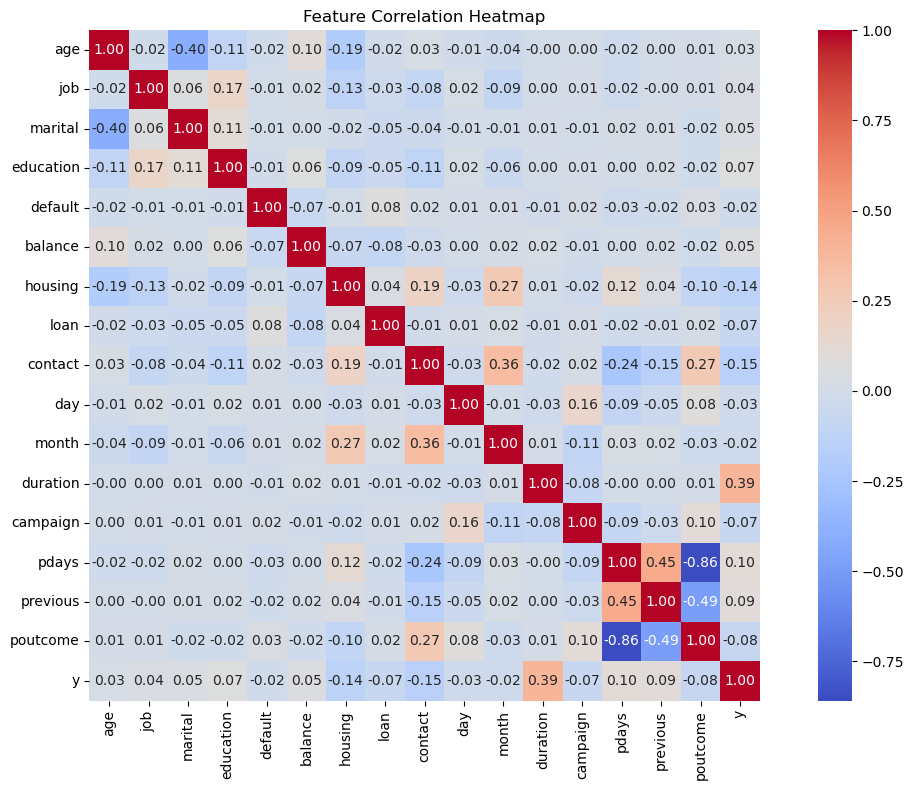

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))
    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    }

results = []


In [15]:
def plot_confusion(model, name):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



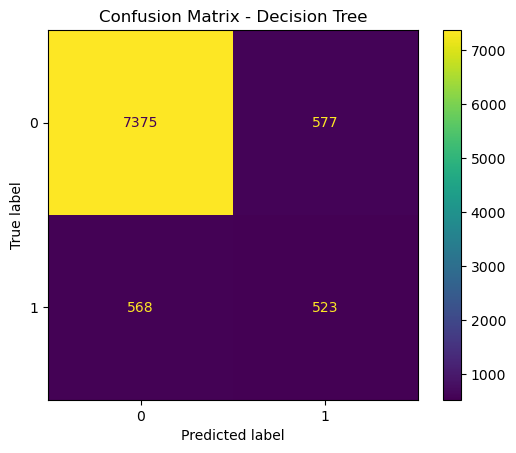

In [16]:
# 1. Decision Tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_dt, "Decision Tree"))
plot_confusion(clf_dt, "Decision Tree")



Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



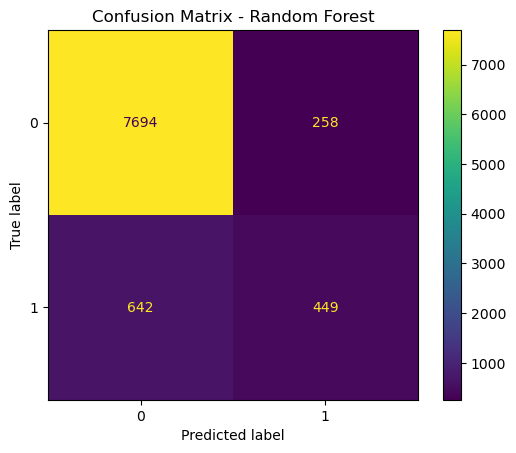

In [17]:
# 2. Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_rf, "Random Forest"))
plot_confusion(clf_rf, "Random Forest")


KNN Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.59      0.33      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



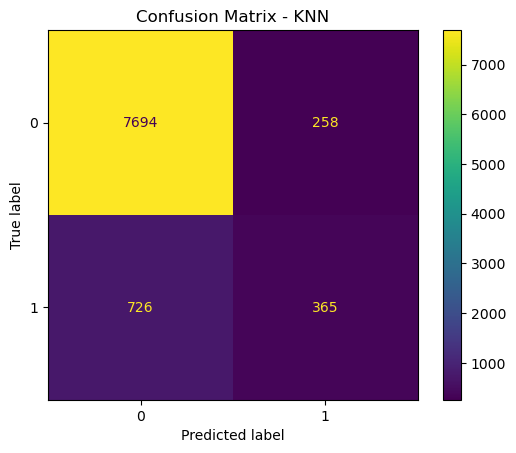

In [18]:
# 3. KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_knn, "KNN"))
plot_confusion(clf_knn, "KNN")


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7952
           1       0.34      0.49      0.40      1091

    accuracy                           0.82      9043
   macro avg       0.63      0.68      0.65      9043
weighted avg       0.86      0.82      0.84      9043



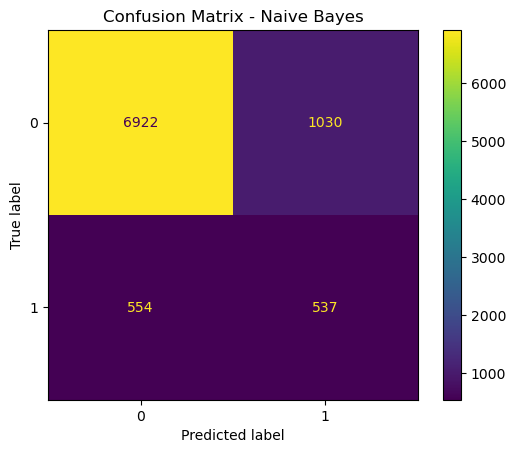

In [19]:
# 4. Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_nb, "Naive Bayes"))
plot_confusion(clf_nb, "Naive Bayes")


SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.67      0.28      0.40      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



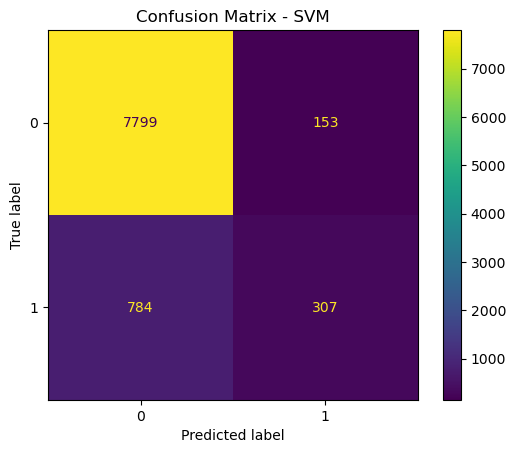

In [20]:
# 5. SVM
clf_svm = SVC(kernel='rbf', random_state=42)
clf_svm.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_svm, "SVM"))
plot_confusion(clf_svm, "SVM")

c:\Users\HOCINE\.conda\envs\DM_ENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7952
           1       0.60      0.43      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.70      0.72      9043
weighted avg       0.89      0.90      0.89      9043



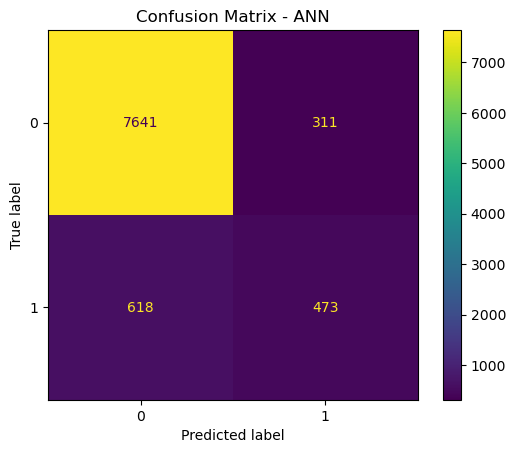

In [21]:
# 6. Neural Network
clf_ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf_ann.fit(X_train_scaled, y_train)
results.append(evaluate_model(clf_ann, "Neural Network"))
plot_confusion(clf_ann, "ANN")

In [22]:
# Display comparison
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)



Model Comparison:
            Model  Accuracy  Precision    Recall  F1-score
0   Decision Tree  0.873383   0.475455  0.479377  0.477408
1   Random Forest  0.900476   0.635078  0.411549  0.499444
2             KNN  0.891187   0.585875  0.334555  0.425904
3     Naive Bayes  0.824837   0.342693  0.492209  0.404063
4             SVM  0.896384   0.667391  0.281393  0.395874
5  Neural Network  0.897269   0.603316  0.433547  0.504533


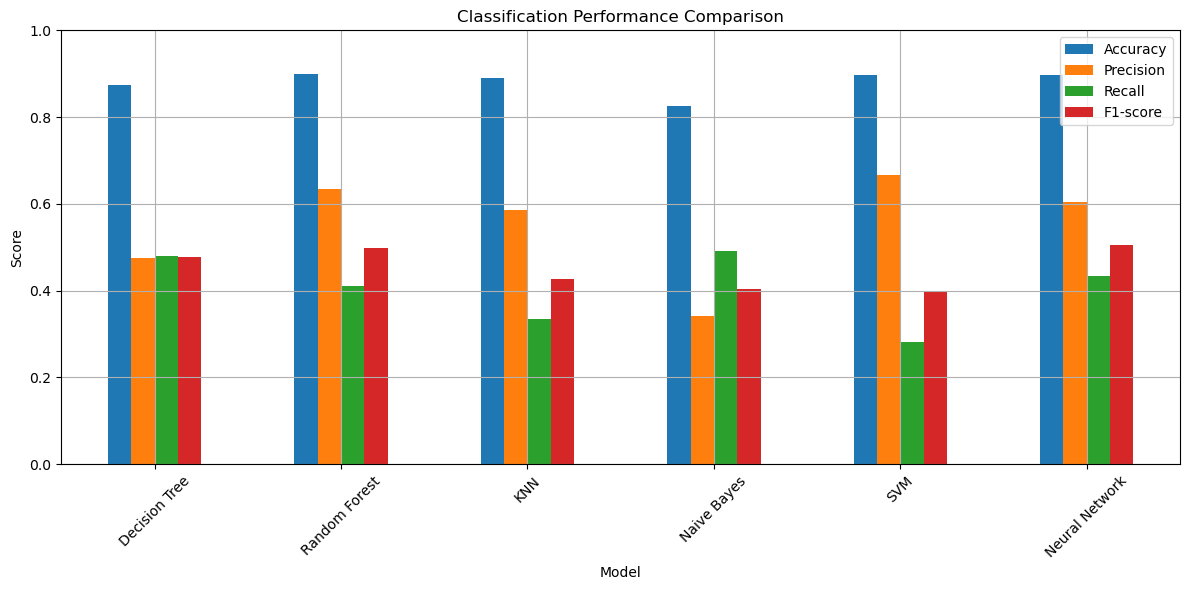

In [23]:
# Plot results
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-score']].plot(kind='bar', figsize=(12, 6))
plt.title("Classification Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
